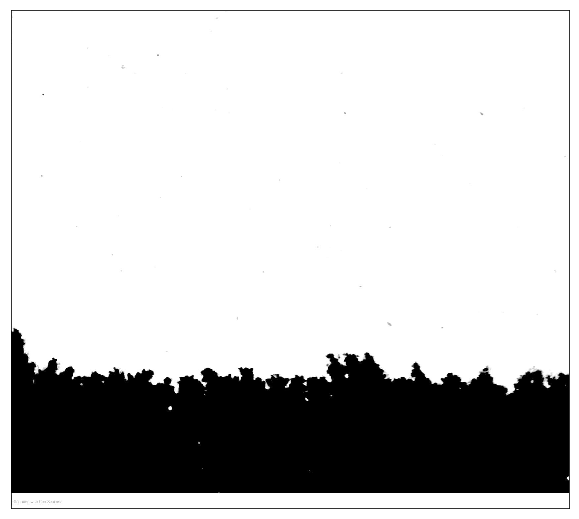

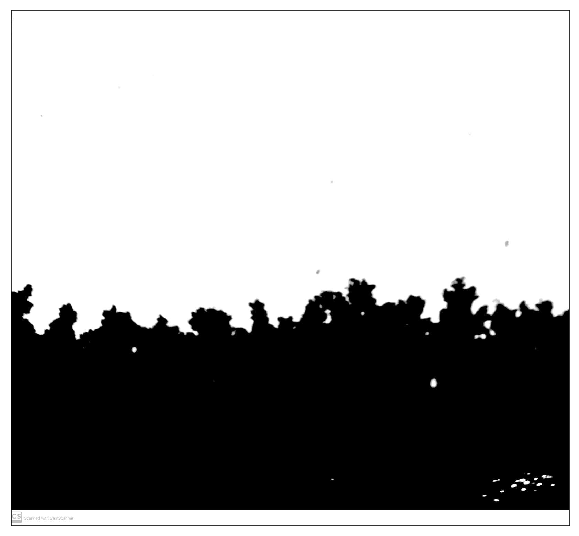

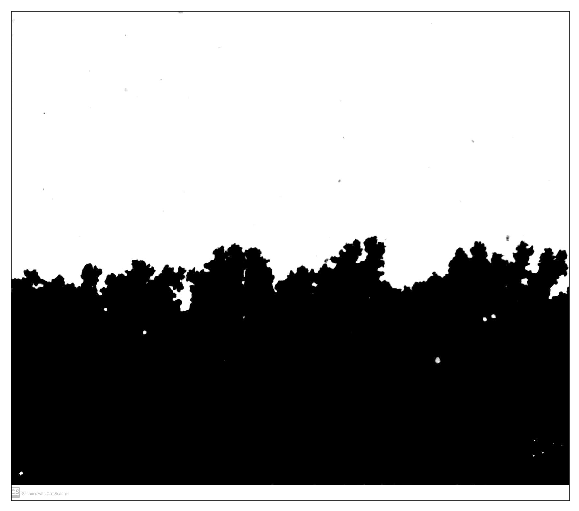

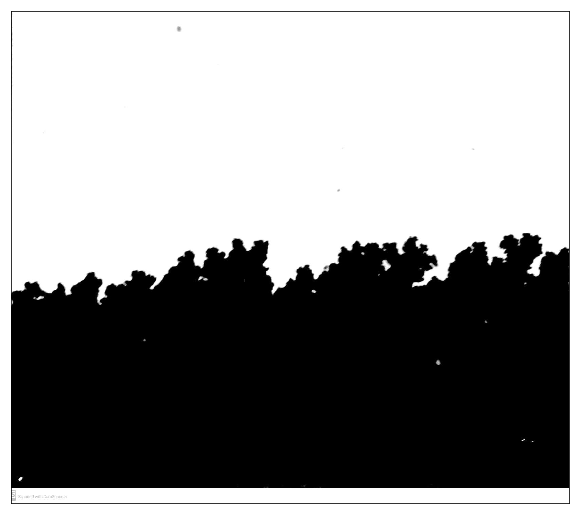

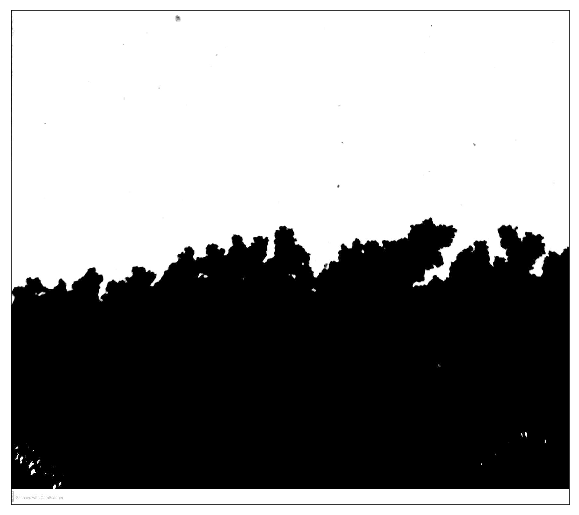

In [12]:
%matplotlib inline
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140]) 
# Read Images
img=[]
for i in range(1,6):
    t=0
    img.append(rgb2gray(mpimg.imread(str(i)+'.jpg'))[-1500:,:])
    while img[i-1][0,t]<50: t+=1
    img[-1]=img[-1][:,t:]
    plt.figure(figsize=(10,20))
    plt.imshow(img[i-1],cmap=plt.get_cmap('gray'))
    plt.gca().axes.get_xaxis().set_ticks([])
    plt.gca().axes.get_yaxis().set_ticks([])
# Output Images


In [13]:
yvals=[[],[],[],[],[]]
for k in range(5):
    for j in range(img[k].shape[1]):
        for i in range(600,1200):
            if img[k][i,j]<100 :
                yvals[k].append(i)
                break

In [14]:
yvals[1]=np.array(yvals[1])+50

In [15]:
for i in [0,1,4]:
    x=range(len(yvals[i]))
    coefficients1 = np.polyfit(x, yvals[i], 1)
    polynomial1 = np.poly1d(coefficients1)

    yvals[i]=yvals[i]+polynomial1(len(yvals[i])/2)-polynomial1(x)

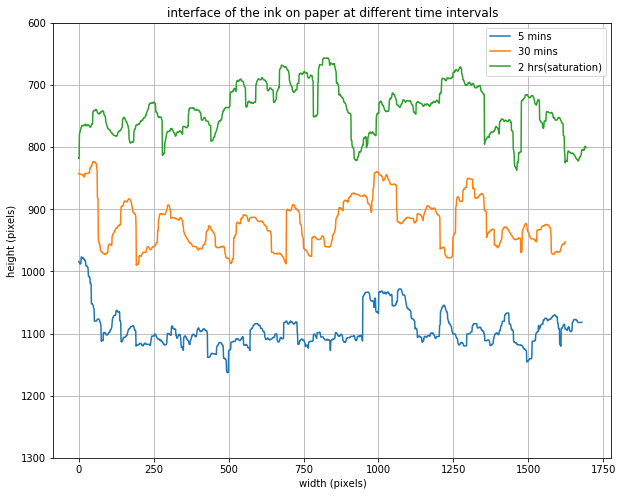

In [16]:
plt.figure(figsize=(10,8))
plt.ylim(1300, 600)
plt.title('interface of the ink on paper at different time intervals')
plt.ylabel('height (pixels)')
plt.xlabel('width (pixels)')
plt.grid()
time=['5 mins','30 mins',0,0,'2 hrs(saturation)']
for k in [0,1,4]:
    #plt.imshow(img1,cmap=plt.get_cmap('gray'))
    plt.plot(yvals[k],'-',label=time[k])
plt.legend()

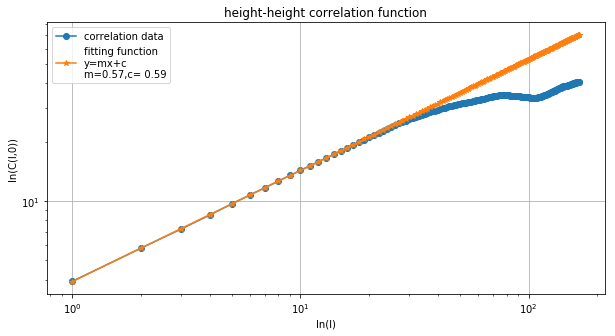

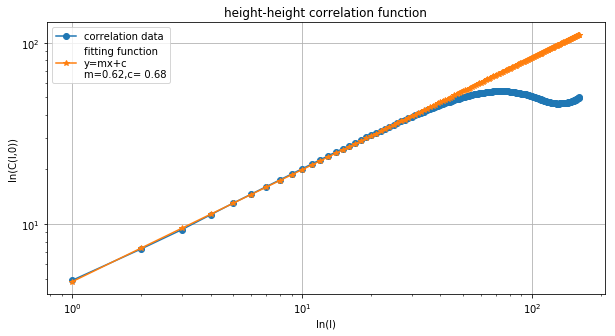

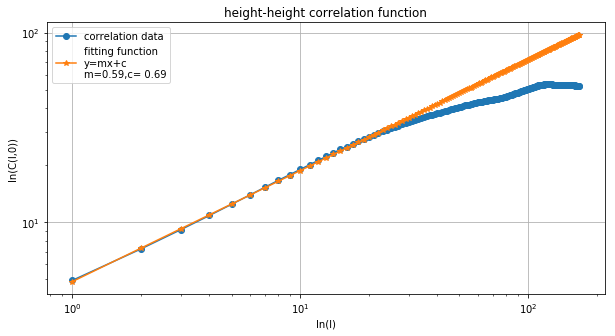

In [51]:
def corr(arr):
    df=[]
    for i in range(1,int(len(arr)/10)):
        df.append(np.sqrt(np.mean((arr[i:]-arr[:-i])**2)))
    return df
coefficients,polynomial=[],[]

for i in [0,1,4]:
    y=corr(np.array(yvals[i]))
    x=range(1,len(y)+1)
    y1=y[:int(len(y)/20)]
    x1=range(1,len(y1)+1)
    coefficients.append(np.polyfit(np.log10(x1), np.log10(y1), 1))
    polynomial.append(np.poly1d(coefficients[-1]))
    log10_y_fit = polynomial[-1](np.log10(x))
    plt.figure(figsize=(10,5))
    plt.plot(x, y, 'o-', label='correlation data')
    plt.plot(x, 10**log10_y_fit, '*-',label='fitting function\ny=mx+c\nm='+str(round(coefficients[-1][0],2))+',c= '+str(round(coefficients[-1][1],2)))
    plt.title('height-height correlation function')
    plt.grid()
    plt.ylabel('ln(C(l,0))')
    plt.xlabel('ln(l)')
    plt.legend()
    plt.yscale('log')
    plt.xscale('log')

In [52]:
coefficients

[array([0.56610941, 0.59125771]),
 array([0.61733318, 0.6825584 ]),
 array([0.58560925, 0.68639769])]

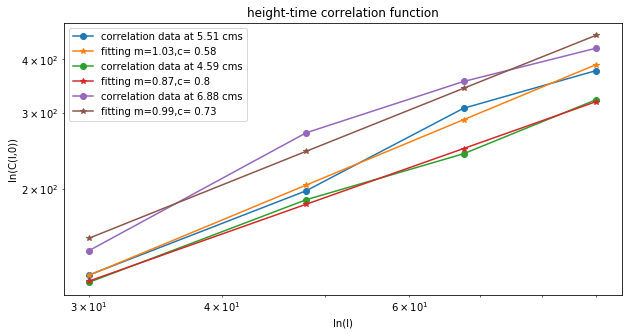

In [48]:
def corr1(arr):
    df=[]
    for i in range(1,int(len(arr))):
        df.append(np.sqrt(np.mean((arr[i:]-arr[:-i])**2)))
    return df
plt.figure(figsize=(10,5))
for k in [1200,1000,1500]:
    arr=[]
    for i in range(5):
        arr.append(yvals[i][k])
    yy=corr1(np.array(arr))
    xx=np.array([20,32,45,60])*3/2
    coeff=np.polyfit(np.log10(xx), np.log10(yy), 1)
    poly=np.poly1d(coeff)
    log10_yy_fit = poly(np.log10(xx))
    con=7.8/1700
    plt.plot(xx, yy, 'o-', label='correlation data at '+str(round(con*k,2))+' cms')
    plt.plot(xx, 10**log10_yy_fit, '*-',label='fitting m='+str(round(coeff[0],2))+',c= '+str(round(coeff[1],2)))
plt.title('height-time correlation function')
plt.grid()
plt.ylabel('ln(C(l,0))')
plt.xlabel('ln(l)')
plt.legend()
plt.yscale('log')
plt.xscale('log')

In [49]:
coef=[]
for k in range(100,1500,100):
    arr=[]
    for i in range(5):
        arr.append(yvals[i][k])
    yy=corr1(np.array(arr))
    xx=[30,48,66,90]
    coef.append(np.polyfit(np.log10(xx), np.log10(yy), 1)[0])
print('mean value of slope = '+str(round(np.mean(coef),2))+" (+/-) "+str(round(np.std(coef),2)))

mean value of slope = 0.99 (+/-) 0.09


In [30]:
7.8/1700

0.004588235294117647